In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_task1.csv")
pd.set_option("display.max_columns", None)
print()
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df = df.drop('customerID',axis=1)

In [5]:
# checking for any empty string in TotalCharges and removing them
print(f'{ ' ' in df['TotalCharges'].values}')
df['TotalCharges'].replace(' ',np.nan,inplace=True)

True


C:\Users\HARSH\AppData\Local\Temp\ipykernel_22352\1068803888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ',np.nan,inplace=True)


In [6]:
# observing the changes in TotalCharges
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
# changing the dtype to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
# checking and droping duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count:
    df = df.drop_duplicates()
    print(f"Dropped {duplicate_count} duplicate rows. New shape: {df.shape}")

df.info()

Dropped 22 duplicate rows. New shape: (7021, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16

In [9]:
# checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# checking for any final duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# check for number of categories in categorical columns and checking for any empty strings in them
obj_col = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in obj_col:
    print(df[col].value_counts())
    print(f'Number of null values in {col} is : {df[col].isnull().sum()}')
    print(f'{' ' in df[col].values}')

gender
Male      3541
Female    3480
Name: count, dtype: int64
Number of null values in gender is : 0
False
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Number of null values in Partner is : 0
False
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
Number of null values in Dependents is : 0
False
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
Number of null values in PhoneService is : 0
False
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
Number of null values in MultipleLines is : 0
False
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
Number of null values in InternetService is : 0
False
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
Number of null values in OnlineSecurity is : 0
False
OnlineBackup
No                     3080
Yes                   

In [13]:
# notice that "no internet service" in columns like "OnlineSecurity","StreamingTV" etc is redundant,
# it is already present in the "InternetService" column 
# similar situation for "PhoneService" and "MultipleLines" columns
cols_to_fix = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

for col in cols_to_fix:
    df[col] = df[col].replace({"No internet service": "No", "No phone service": "No"})


In [14]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
# preprocessing on copy of original data, for any comparison to be made with original and processed
df.shape
df1 = df.copy()

In [16]:
# using the SimpleImputer for "TotalCharges" column
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
S_impute = SimpleImputer(strategy="median")
knn_impute  = KNNImputer(n_neighbors=2)
df1["TotalCharges"] = S_impute.fit_transform(df1[["TotalCharges"]])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [18]:
# dividing the data in numerical and categorical columns 
binary_categories = ['Churn','PhoneService','gender','Partner','Dependents','PaperlessBilling',
                     'MultipleLines','OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport',
                     'StreamingMovies','StreamingTV']
ohe_categories = ['PaymentMethod','Contract','InternetService']
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]

In [19]:
# Using the column transformer for encoding categorical data and scaling numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
ohe_transformer = OneHotEncoder(handle_unknown="ignore")
binary_transformer = OrdinalEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('binary',binary_transformer, binary_categories),
        ("ohe", ohe_transformer, ohe_categories),
        ('scaler',StandardScaler(),numeric_features)
        
    ],
    remainder='passthrough'
)

In [20]:
# fiting the columnTransformer on data and using the "get_feature_names_out()" 
# function to retain the column names
preprocessor.fit(df1)
df1_transformed = pd.DataFrame(
    preprocessor.transform(df1),
    columns=preprocessor.get_feature_names_out()
)

In [21]:
# encoded and scaled data ready
df1_transformed.head(15)

,binary__Churn,binary__PhoneService,binary__gender,binary__Partner,binary__Dependents,binary__PaperlessBilling,binary__MultipleLines,binary__OnlineBackup,binary__OnlineSecurity,binary__DeviceProtection,binary__TechSupport,binary__StreamingMovies,binary__StreamingTV,ohe__PaymentMethod_Bank transfer (automatic),ohe__PaymentMethod_Credit card (automatic),ohe__PaymentMethod_Electronic check,ohe__PaymentMethod_Mailed check,ohe__Contract_Month-to-month,ohe__Contract_One year,ohe__Contract_Two year,ohe__InternetService_DSL,ohe__InternetService_Fiber optic,ohe__InternetService_No,scaler__tenure,scaler__MonthlyCharges,scaler__TotalCharges,remainder__SeniorCitizen
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.282728,-1.164135,-0.997334,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.062387,-0.262811,-0.176352,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.241967,-0.365914,-0.962766,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.510759,-0.750058,-0.197874,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.241967,0.194503,-0.943562,0.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.997401,1.157358,-0.648285,0.0
6,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.426746,0.806473,-0.149908,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.915879,-1.167461,-0.877231,0.0
8,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.182179,1.328642,0.334231,0.0
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.203697,-0.289418,0.529317,0.0


In [22]:
# using correlation analysis on data with respect to target variable
corr_matrix = df1_transformed.corr(method="pearson")
target_corr = corr_matrix["binary__Churn"].sort_values(ascending=False)
print(target_corr)

binary__Churn                                   1.000000
ohe__Contract_Month-to-month                    0.404884
ohe__InternetService_Fiber optic                0.308170
ohe__PaymentMethod_Electronic check             0.301544
scaler__MonthlyCharges                          0.194508
binary__PaperlessBilling                        0.190891
remainder__SeniorCitizen                        0.151619
binary__StreamingTV                             0.065032
binary__StreamingMovies                         0.063192
binary__MultipleLines                           0.041958
binary__PhoneService                            0.011323
binary__gender                                 -0.008763
binary__DeviceProtection                       -0.064944
binary__OnlineBackup                           -0.081092
ohe__PaymentMethod_Mailed check                -0.092562
ohe__PaymentMethod_Bank transfer (automatic)   -0.117242
ohe__InternetService_DSL                       -0.124223
ohe__PaymentMethod_Credit card 

In [23]:
# selecting the features with correlation above "0.1"
threshold = 0.1
selected_features = target_corr[abs(target_corr) >= threshold].index.tolist()
print("Selected features:", selected_features)
print(len(selected_features))

Selected features: ['binary__Churn', 'ohe__Contract_Month-to-month', 'ohe__InternetService_Fiber optic', 'ohe__PaymentMethod_Electronic check', 'scaler__MonthlyCharges', 'binary__PaperlessBilling', 'remainder__SeniorCitizen', 'ohe__PaymentMethod_Bank transfer (automatic)', 'ohe__InternetService_DSL', 'ohe__PaymentMethod_Credit card (automatic)', 'binary__Partner', 'binary__Dependents', 'binary__TechSupport', 'binary__OnlineSecurity', 'ohe__Contract_One year', 'scaler__TotalCharges', 'ohe__InternetService_No', 'ohe__Contract_Two year', 'scaler__tenure']
19


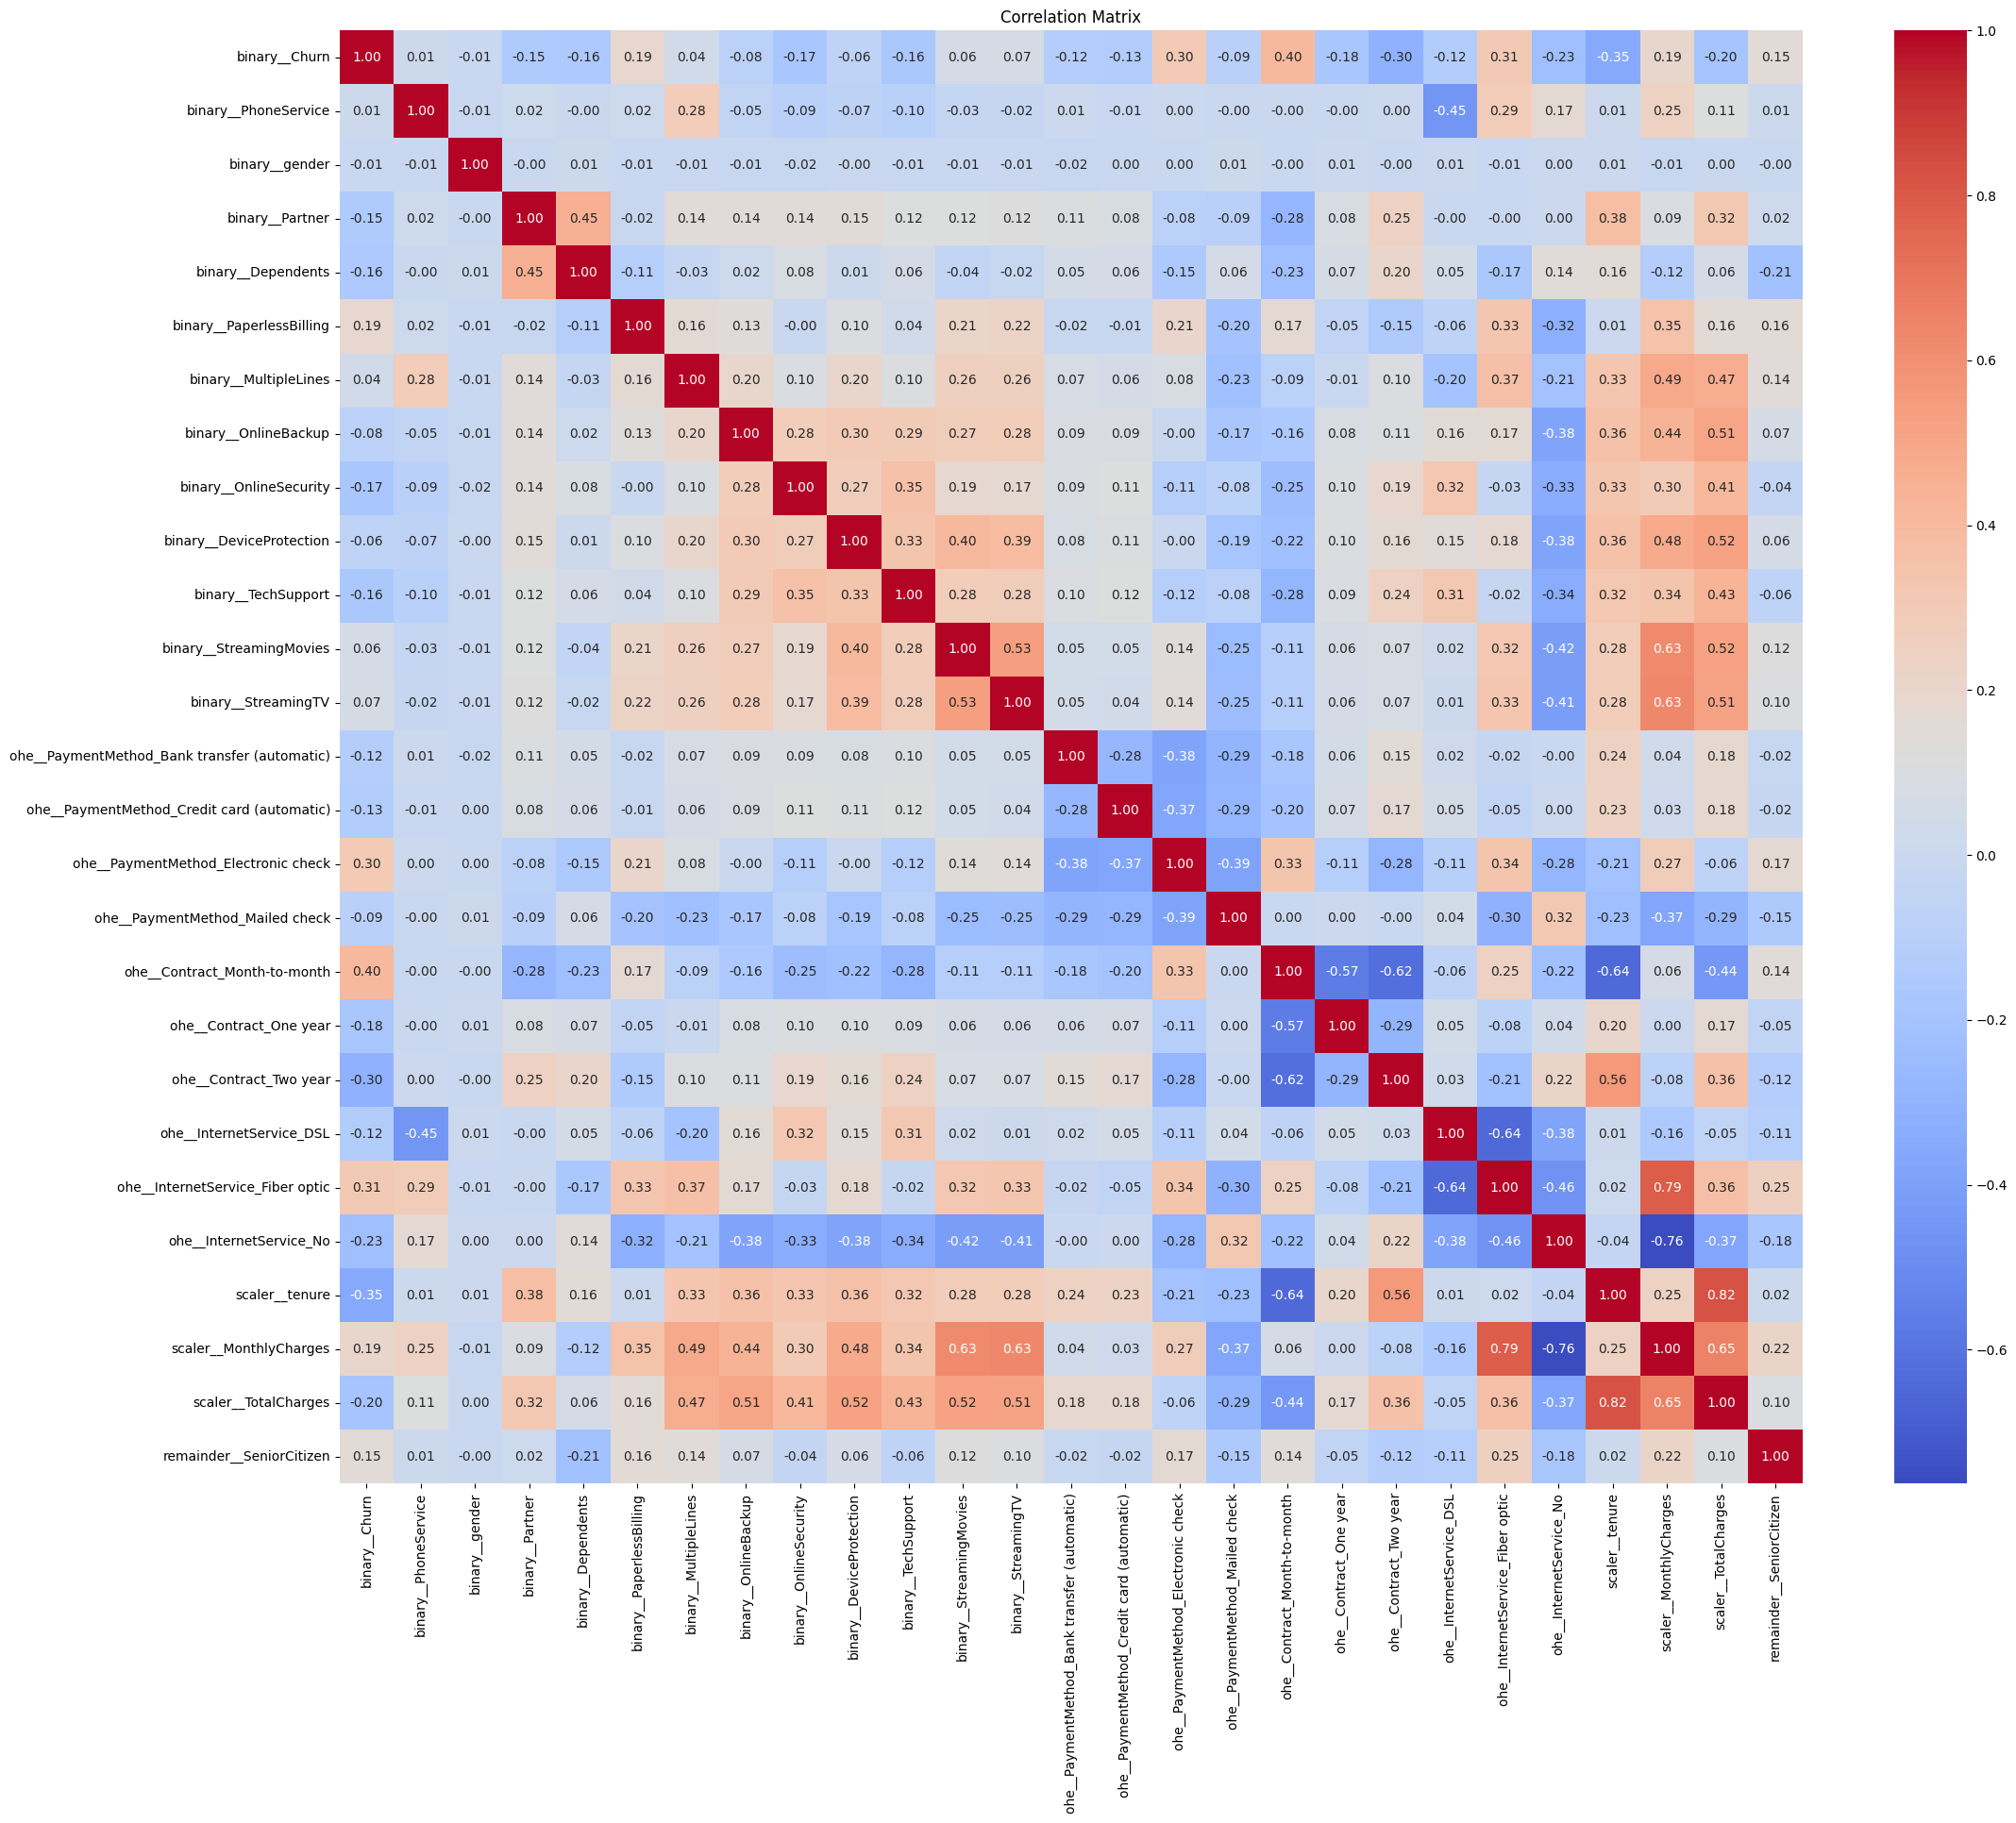

In [24]:
# visualizing the correlation matrix for the data before feature selection
corr = df1_transformed.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [25]:
# forming a new dataframe with selected features
df1_new = df1_transformed[selected_features]

In [26]:
df1_new.head(15)

,binary__Churn,ohe__Contract_Month-to-month,ohe__InternetService_Fiber optic,ohe__PaymentMethod_Electronic check,scaler__MonthlyCharges,binary__PaperlessBilling,remainder__SeniorCitizen,ohe__PaymentMethod_Bank transfer (automatic),ohe__InternetService_DSL,ohe__PaymentMethod_Credit card (automatic),binary__Partner,binary__Dependents,binary__TechSupport,binary__OnlineSecurity,ohe__Contract_One year,scaler__TotalCharges,ohe__InternetService_No,ohe__Contract_Two year,scaler__tenure
0,0.0,1.0,0.0,1.0,-1.164135,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.997334,0.0,0.0,-1.282728
1,0.0,0.0,0.0,0.0,-0.262811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.176352,0.0,0.0,0.062387
2,1.0,1.0,0.0,0.0,-0.365914,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.962766,0.0,0.0,-1.241967
3,0.0,0.0,0.0,0.0,-0.750058,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.197874,0.0,0.0,0.510759
4,1.0,1.0,1.0,1.0,0.194503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.943562,0.0,0.0,-1.241967
5,1.0,1.0,1.0,1.0,1.157358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.648285,0.0,0.0,-0.997401
6,0.0,1.0,1.0,0.0,0.806473,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.149908,0.0,0.0,-0.426746
7,0.0,1.0,0.0,0.0,-1.167461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.877231,0.0,0.0,-0.915879
8,1.0,1.0,1.0,1.0,1.328642,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.334231,0.0,0.0,-0.182179
9,0.0,0.0,0.0,0.0,-0.289418,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.529317,0.0,0.0,1.203697


In [27]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   binary__Churn                                 7021 non-null   float64
 1   ohe__Contract_Month-to-month                  7021 non-null   float64
 2   ohe__InternetService_Fiber optic              7021 non-null   float64
 3   ohe__PaymentMethod_Electronic check           7021 non-null   float64
 4   scaler__MonthlyCharges                        7021 non-null   float64
 5   binary__PaperlessBilling                      7021 non-null   float64
 6   remainder__SeniorCitizen                      7021 non-null   float64
 7   ohe__PaymentMethod_Bank transfer (automatic)  7021 non-null   float64
 8   ohe__InternetService_DSL                      7021 non-null   float64
 9   ohe__PaymentMethod_Credit card (automatic)    7021 non-null   f

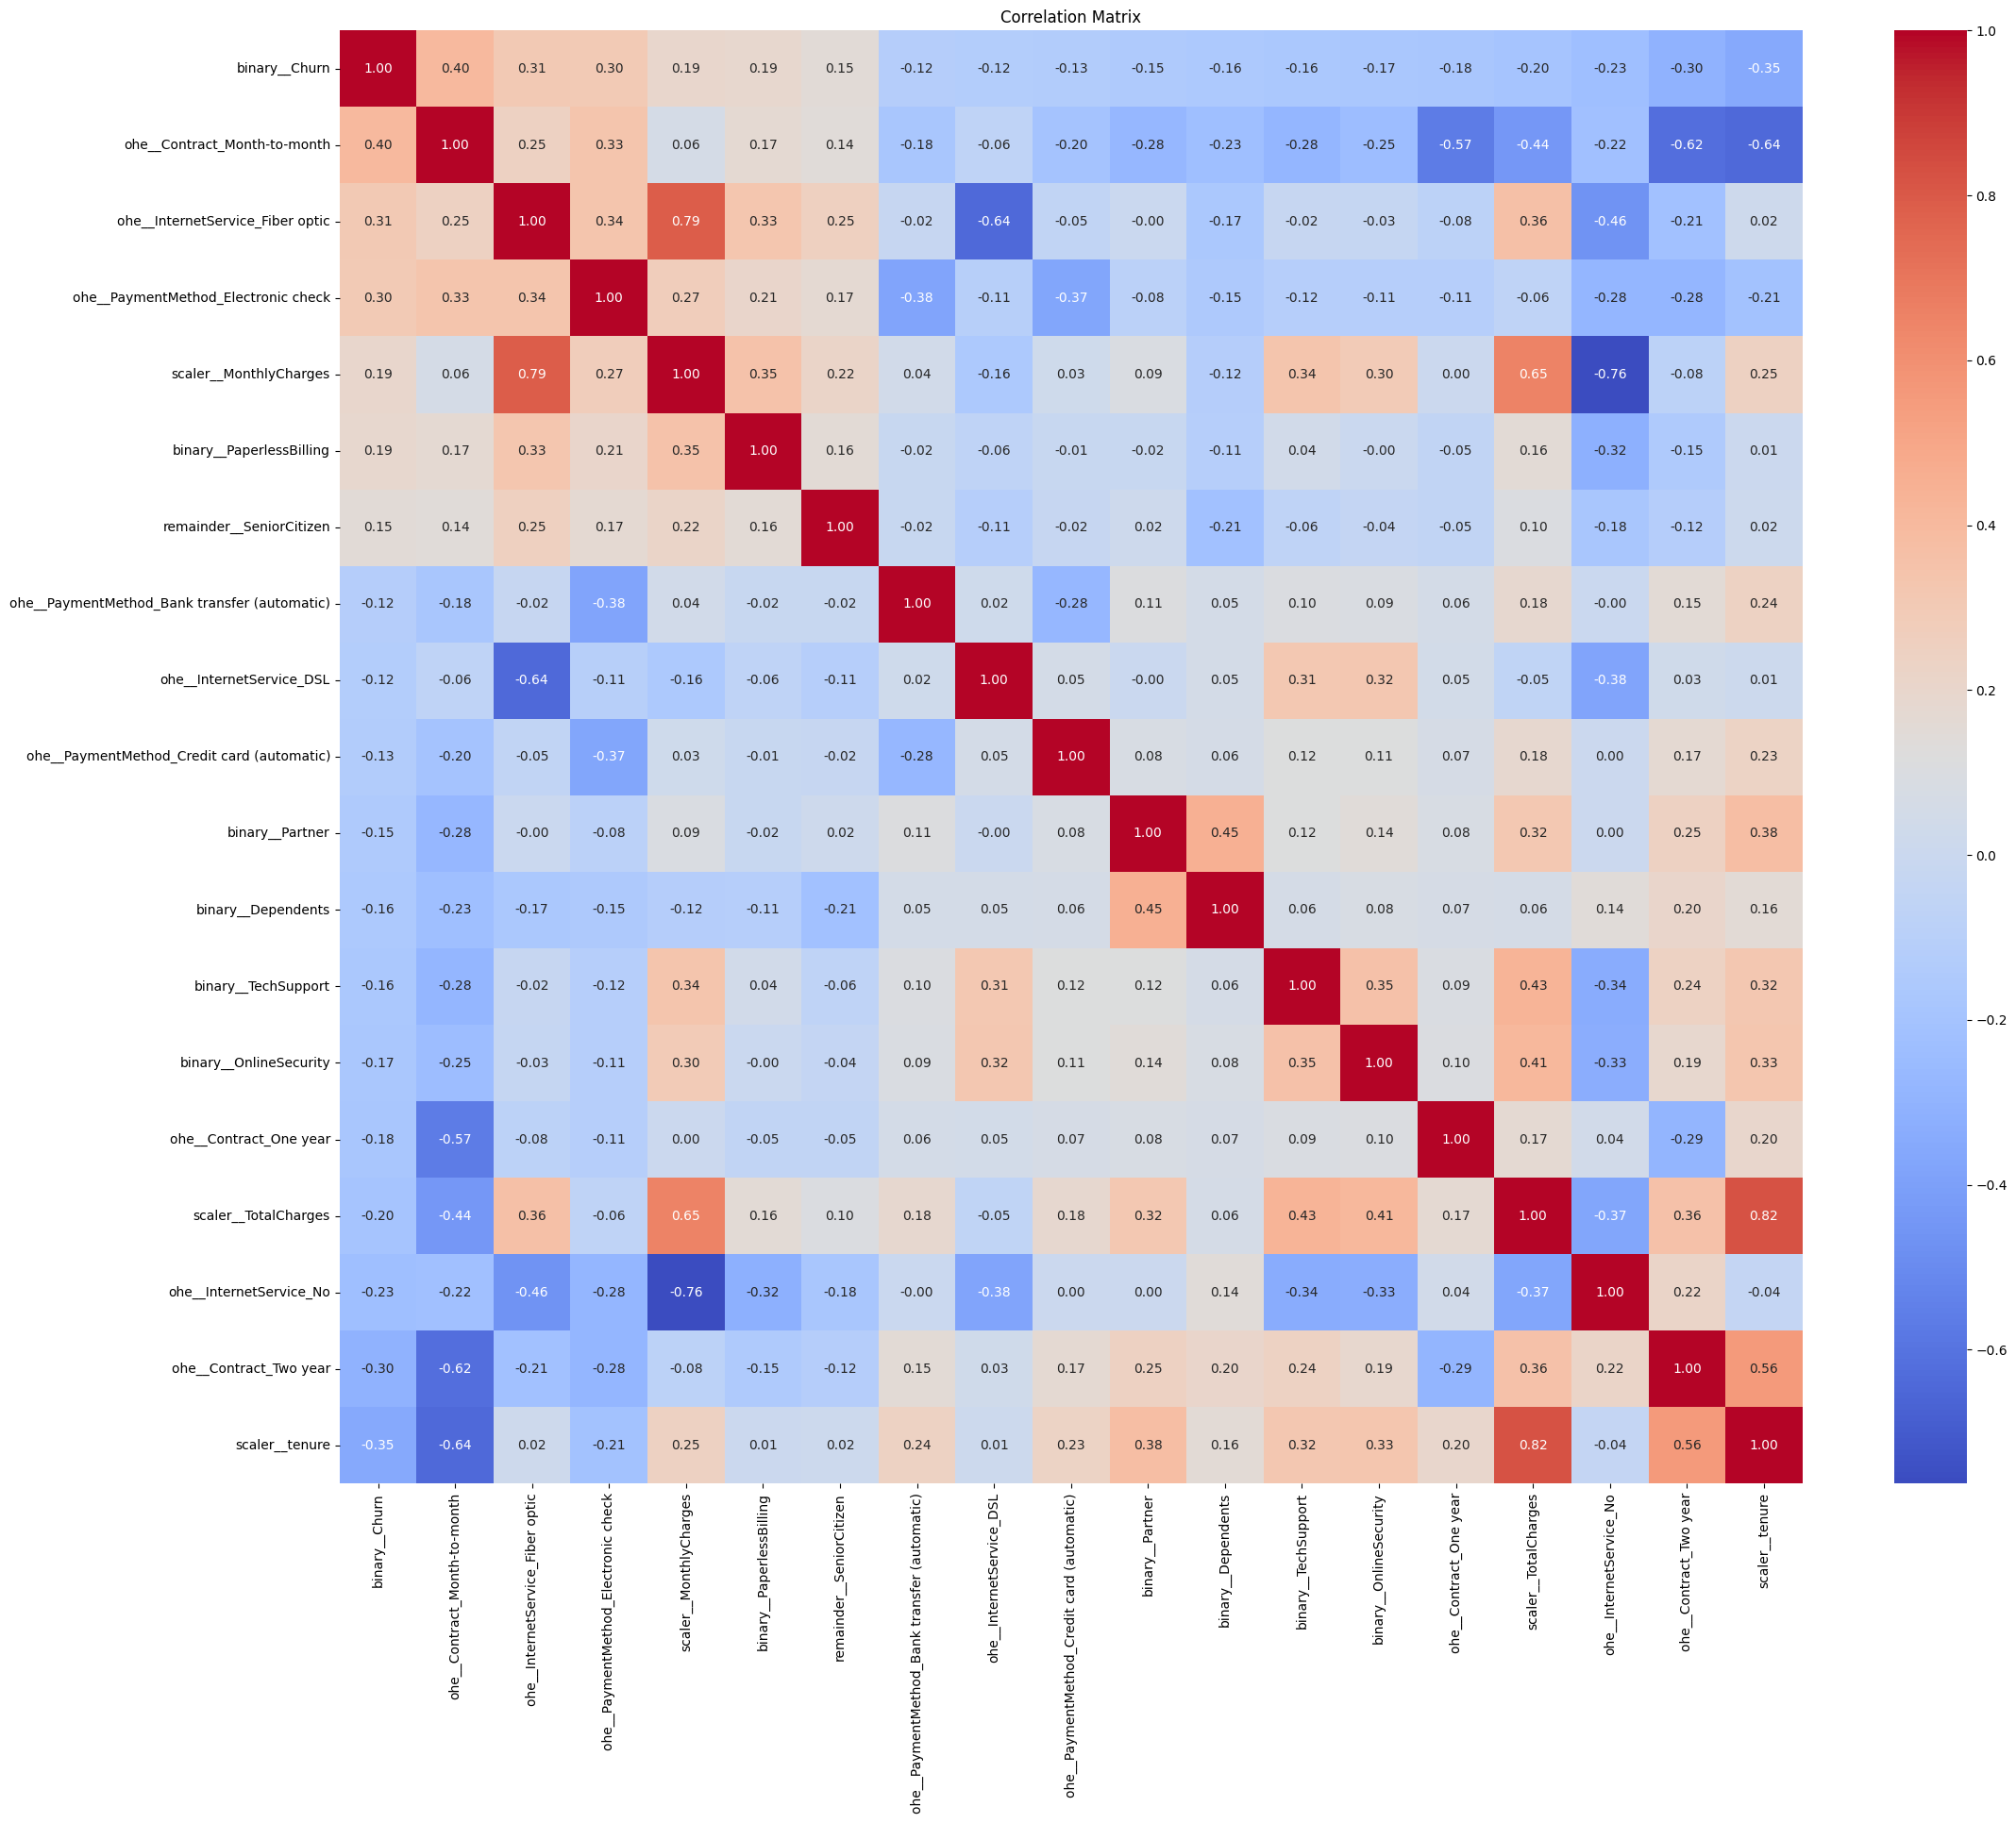

In [28]:
# visualizing correlation of new data with selected features
corr = df1_new.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# checking for class imbalance
df1_new['binary__Churn'].value_counts()

binary__Churn
0.0    5164
1.0    1857
Name: count, dtype: int64

In [30]:
# splitting the clean data
from sklearn.model_selection import train_test_split
X1 = df1_new.drop('binary__Churn', axis=1)
y1 = df1_new['binary__Churn']
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)
x1_train.shape, y1_train.shape , x1_test.shape , y1_test.shape

((5616, 18), (5616,), (1405, 18), (1405,))

In [31]:
# since we observe class imbalance applying oversampling on split data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X1_res_train, y1_res_train = sm.fit_resample(x1_train, y1_train)

In [32]:
X1_res_train

,ohe__Contract_Month-to-month,ohe__InternetService_Fiber optic,ohe__PaymentMethod_Electronic check,scaler__MonthlyCharges,binary__PaperlessBilling,remainder__SeniorCitizen,ohe__PaymentMethod_Bank transfer (automatic),ohe__InternetService_DSL,ohe__PaymentMethod_Credit card (automatic),binary__Partner,binary__Dependents,binary__TechSupport,binary__OnlineSecurity,ohe__Contract_One year,scaler__TotalCharges,ohe__InternetService_No,ohe__Contract_Two year,scaler__tenure
0,1.000000,1.0,1.0,0.468892,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.843459,0.0,0.000000,-1.119684
1,1.000000,0.0,0.0,-0.469018,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.988107,0.0,0.000000,-1.282728
2,1.000000,0.0,1.0,-0.660258,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,-0.468098,0.0,0.000000,-0.141418
3,1.000000,0.0,0.0,-1.481761,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,-0.992742,1.0,0.000000,-1.241967
4,0.000000,1.0,0.0,1.721101,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,2.101639,0.0,0.000000,1.122175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0.059943,1.0,1.0,1.393593,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.841011,0.0,0.940057,1.172709
8252,0.000000,0.0,0.0,0.133303,0.869026,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.130974,1.0,0.621060,0.0,0.000000,0.898963
8253,1.000000,1.0,1.0,0.832219,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.824180,0.0,0.000000,-1.135744
8254,1.000000,1.0,1.0,0.865538,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,-0.538469,0.0,0.000000,-0.808065


In [33]:
# class balanced
y1_res_train.value_counts()

binary__Churn
1.0    4128
0.0    4128
Name: count, dtype: int64

In [34]:
# but test data class is kept imbalanced to check for how good the model can preform
y1_test.value_counts()

binary__Churn
0.0    1036
1.0     369
Name: count, dtype: int64

In [35]:
# beginning the model training and testing 
# firstly with hyperparameter tuned logistic regression and its normal form
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_classifier = LogisticRegression()
parameter = {'penalty':['l1','l2','elasticnet'] ,'C':[1,5,10,15,20,50,75,100] ,'max_iter':[100,200,500]}
grid_classifier=GridSearchCV(estimator=log_classifier,param_grid=parameter,scoring='accuracy',cv=5)
grid_classifier.fit(X1_res_train,y1_res_train)

c:\Users\HARSH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HARSH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HARSH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HARSH\App

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 5, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [36]:
print(f'Selected parameters for logistic using gridSearch:\n{grid_classifier.best_params_}')
print(f'Best accuracy score: {grid_classifier.best_score_}')
predictions1 = grid_classifier.predict(x1_test)

Selected parameters for logistic using gridSearch:
{'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best accuracy score: 0.7622340558147311


In [37]:
# checking output of normal logistic on smote data
log1 = log_classifier.fit(X1_res_train,y1_res_train)
predictions2 = log1.predict(x1_test)

In [38]:
# checking output of normal logistic on pre smote data
log2 = log_classifier.fit(x1_train,y1_train)
predictions3 = log2.predict(x1_test)

In [39]:
from sklearn.metrics import accuracy_score,classification_report
print(f'accuracy for classification from gridsearchCV : {accuracy_score(predictions1,y1_test)}')
print(f'accuracy for classification from normal logistic : {accuracy_score(predictions2,y1_test)}')
print(f'accuracy on data without smote:{accuracy_score(predictions3,y1_test)}')

accuracy for classification from gridsearchCV : 0.7402135231316725
accuracy for classification from normal logistic : 0.7402135231316725
accuracy on data without smote:0.7907473309608541


In [40]:
print(f'Classification report for gridsearchCV on smote data:\n{classification_report(predictions1,y1_test)}')
print(f'Classification report for normal logistic, smote data:\n{classification_report(predictions2,y1_test)}')
print(f'Classification report for normal logistic, data without smote:\n{classification_report(predictions3,y1_test)}')

Classification report for gridsearchCV on smote data:
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80       827
         1.0       0.79      0.50      0.61       578

    accuracy                           0.74      1405
   macro avg       0.76      0.70      0.71      1405
weighted avg       0.75      0.74      0.73      1405

Classification report for normal logistic, smote data:
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80       827
         1.0       0.79      0.50      0.61       578

    accuracy                           0.74      1405
   macro avg       0.76      0.70      0.71      1405
weighted avg       0.75      0.74      0.73      1405

Classification report for normal logistic, data without smote:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      1092
         1.0       0.53      0.62      0.57       313

    accura

In [41]:
# using the decision tree classifier on smote + non smote data
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X1_res_train,y1_res_train)
predictions4 = tree_model.predict(x1_test)
print(f'accuracy for decision tree with smote data: {accuracy_score(predictions4,y1_test)}')

accuracy for decision tree with smote data: 0.7145907473309608


In [42]:
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(x1_train,y1_train)
predictions5 = tree_model2.predict(x1_test)
print(f'accuracy for decision tree without smote data: {accuracy_score(predictions5,y1_test)}')

accuracy for decision tree without smote data: 0.7188612099644128


In [43]:
print(f'Classification report of decision tree with smote:\n{classification_report(predictions4,y1_test)}')
print(f'Classification report of decision tree without smote:\n{classification_report(predictions5,y1_test)}')

Classification report of decision tree with smote:
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       945
         1.0       0.58      0.47      0.52       460

    accuracy                           0.71      1405
   macro avg       0.67      0.65      0.66      1405
weighted avg       0.70      0.71      0.71      1405

Classification report of decision tree without smote:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       999
         1.0       0.51      0.47      0.49       406

    accuracy                           0.72      1405
   macro avg       0.65      0.64      0.65      1405
weighted avg       0.71      0.72      0.71      1405



In [44]:
# using Random forest classifier without hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=150,max_samples=0.75,random_state=42)
rf1.fit(X1_res_train,y1_res_train)
rf_pred1 = rf1.predict(x1_test)
print(f'accuracy for random forest with smote data: {accuracy_score(rf_pred1,y1_test)}')
print(classification_report(rf_pred1,y1_test))

accuracy for random forest with smote data: 0.7615658362989324
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       985
         1.0       0.62      0.54      0.58       420

    accuracy                           0.76      1405
   macro avg       0.71      0.70      0.70      1405
weighted avg       0.75      0.76      0.76      1405



In [45]:
rf2 = RandomForestClassifier(n_estimators=150,max_samples=0.75,random_state=42)
rf2.fit(x1_train,y1_train)
rf_pred2 = rf2.predict(x1_test)
print(f'accuracy for random forest without smote data: {accuracy_score(rf_pred2,y1_test)}')
print(classification_report(rf_pred2,y1_test))

accuracy for random forest without smote data: 0.7736654804270463
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1106
         1.0       0.47      0.59      0.52       299

    accuracy                           0.77      1405
   macro avg       0.68      0.70      0.69      1405
weighted avg       0.79      0.77      0.78      1405



In [46]:
# applying hyper parameter tuning on random forests
param = {
    'n_estimators':[100,200,300],
    'max_features':["sqrt", "log2"],
    'max_depth':[None, 10, 20, 30],
    'max_samples':[0.5,0.75]
}
rf3 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,scoring='accuracy',cv=5)
rf3.fit(X1_res_train,y1_res_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'max_samples': [0.5, 0.75], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [ ]:
# checking for best selected hyper parameters and best accuracy score
print(rf3.best_params_)
print(rf3.best_score_)
rf_pred3 = rf3.predict(x1_test)

{'max_depth': 20, 'max_features': 'sqrt', 'max_samples': 0.75, 'n_estimators': 300}
0.8464211285844812


In [48]:
print(f'accuracy of hypertuned random forest on smote : {accuracy_score(rf_pred3,y1_test)}')
print(f'Classification report : {classification_report(rf_pred3,y1_test)}')

accuracy of hypertuned random forest on smote : 0.7558718861209964
Classification report :               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       977
         1.0       0.62      0.53      0.57       428

    accuracy                           0.76      1405
   macro avg       0.71      0.69      0.70      1405
weighted avg       0.75      0.76      0.75      1405



In [ ]:
# Using the LDA directly as classifier on smote data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1_res_train,y1_res_train)
lda_pred = lda.predict(x1_test)
print(f'accuracy with LDA on smote data: {accuracy_score(lda_pred,y1_test)}')
print(f'classification report: \n{classification_report(lda_pred,y1_test)}')

accuracy with LDA on smote data: 0.7380782918149467
classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       828
         1.0       0.78      0.50      0.61       577

    accuracy                           0.74      1405
   macro avg       0.75      0.70      0.71      1405
weighted avg       0.75      0.74      0.72      1405



In [ ]:
# On non smote data
lda.fit(x1_train,y1_train)
lda_pred1 = lda.predict(x1_test)
print(f'accuracy with LDA on non smote data: {accuracy_score(lda_pred1,y1_test)}')
print(f'classification report: \n{classification_report(lda_pred1,y1_test)}')

accuracy with LDA on non smote data: 0.7864768683274022
classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1086
         1.0       0.53      0.61      0.56       319

    accuracy                           0.79      1405
   macro avg       0.70      0.72      0.71      1405
weighted avg       0.80      0.79      0.79      1405



In [ ]:
# Using LDA to reduce dimensionality and fit that data on another classifier
lda2 = LinearDiscriminantAnalysis(n_components=1)
x1_train_lda = lda2.fit_transform(X1_res_train,y1_res_train)
x1_test_lda = lda2.transform(x1_test)
log_classifier.fit(x1_train_lda,y1_res_train)
predict = log_classifier.predict(x1_test_lda)
print(f'accuracy with lda as dimension reduction on smote data: {accuracy_score(predict,y1_test)}')
print(f'Classifictaion report:\n{classification_report(predict,y1_test)}')

accuracy with lda as dimension reduction on smote data: 0.7466192170818505
Classifictaion report:
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       850
         1.0       0.77      0.51      0.61       555

    accuracy                           0.75      1405
   macro avg       0.75      0.71      0.71      1405
weighted avg       0.75      0.75      0.73      1405

